# Prediction using Unsupervised ML

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.cluster import KMeans
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the iris dataset
df =pd.read_csv("Iris.csv")
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


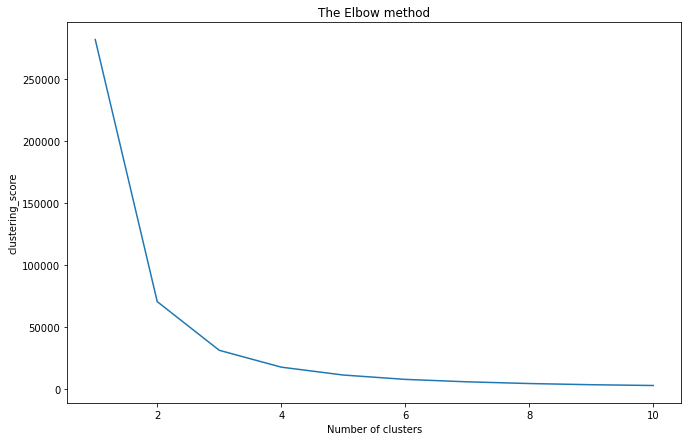

In [3]:
# Finding the optimum number of clusters for k-means classification

x = df.iloc[:, [0, 1, 2, 3]].values
x
clustering_score=[]

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(x)
    clustering_score.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
plt.figure(figsize=(11,7) )
plt.plot(range(1, 11), clustering_score)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('clustering_score') 
plt.show()

In [4]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'random',
                max_iter = 300, n_init = 10, random_state = 42)
y_kmeans = kmeans.fit_predict(x)

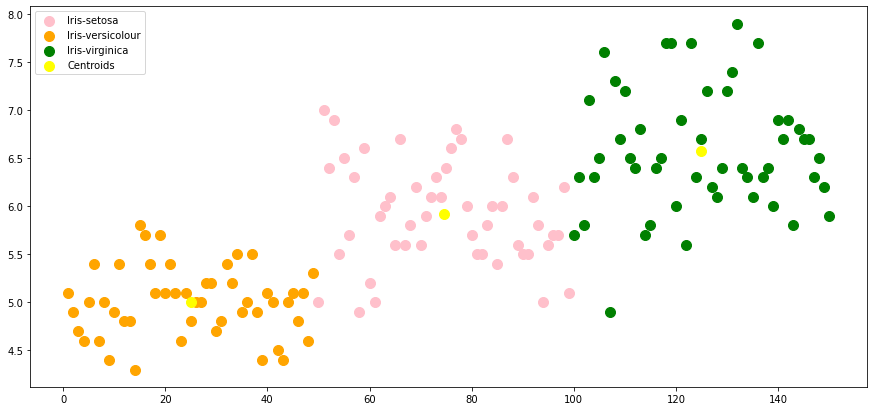

In [5]:
# Visualising cluster 1st two columns
plt.figure(figsize=(15, 7))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'pink', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()